# Housing Price Prediction

## Setup

In [89]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [31]:
os.getcwd()

'C:\\Users\\presc\\Downloads\\Projects\\Housing Price Prediction'

In [32]:
df= pd.read_csv('C:\\Users\\presc\\Downloads\\Projects\\Housing Price Prediction\Housing.csv')

In [33]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [34]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## EDA

[Text(0.5, 0, 'Price (Millions)'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Home Price Distribution')]

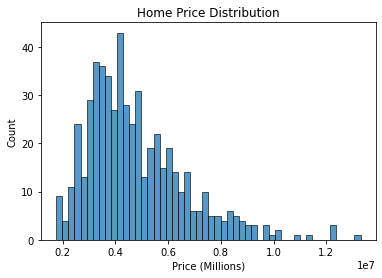

In [35]:
price=sns.histplot(df['price'], bins=50)
price.set(xlabel='Price (Millions)', ylabel='Count',title='Home Price Distribution')

C:\Users\presc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Price (Millions)'),
 Text(0, 0.5, 'Area'),
 Text(0.5, 1.0, 'Scatterplot of Price and Area')]

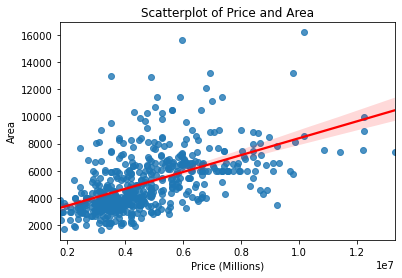

In [36]:
priceAreaScatter=sns.regplot(df['price'],df['area'], line_kws={"color": "red"})
priceAreaScatter.set(xlabel='Price (Millions)', ylabel='Area',title='Scatterplot of Price and Area')

[Text(0.5, 0, 'Number of Bedrooms'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Bedroom Distribution')]

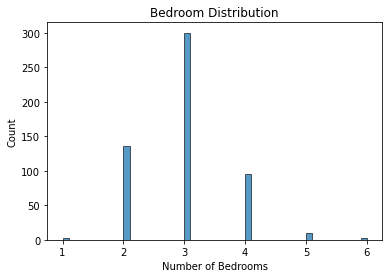

In [37]:
Bedrooms=sns.histplot(df['bedrooms'], bins=50)
Bedrooms.set(xlabel='Number of Bedrooms', ylabel='Count',title='Bedroom Distribution')

[Text(0.5, 0, 'Number of Stories'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Stories Distribution')]

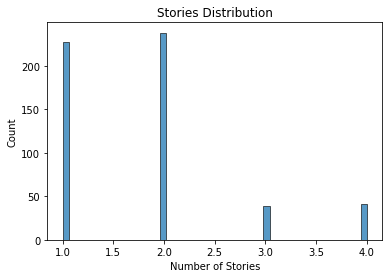

In [38]:
Bedrooms=sns.histplot(df['stories'], bins=50)
Bedrooms.set(xlabel='Number of Stories', ylabel='Count',title='Stories Distribution')

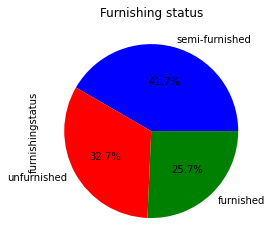

In [39]:
df['furnishingstatus'].value_counts().plot(kind='pie', colors=['blue', 'red', 'green'],autopct='%1.1f%%')
plt.title('Furnishing status')
plt.show()


<AxesSubplot:>

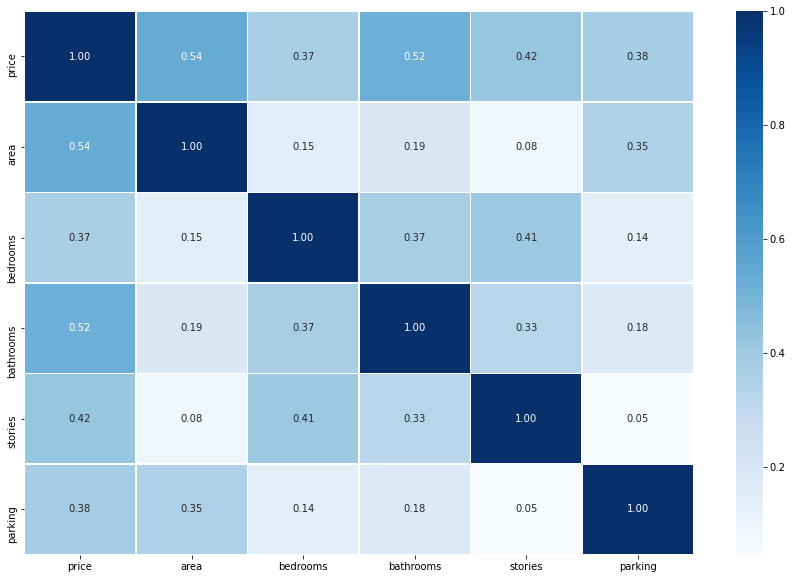

In [40]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,cmap="Blues",linewidths=0.5, fmt='.2f')

## Regression

### Cleaning 

In [57]:
Categorical_Col = []
Numerical_Col = []
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_Col.append(col)
       
    else:
        Numerical_Col.append(col)
#Categorical_Col
#Numerical_Col

In [58]:
for col in Categorical_Col:
    print('Column Name: ', col, 'Unique Values: ', df[col].unique())

Column Name:  mainroad Unique Values:  ['yes' 'no']
Column Name:  guestroom Unique Values:  ['no' 'yes']
Column Name:  basement Unique Values:  ['no' 'yes']
Column Name:  hotwaterheating Unique Values:  ['no' 'yes']
Column Name:  airconditioning Unique Values:  ['yes' 'no']
Column Name:  prefarea Unique Values:  ['yes' 'no']
Column Name:  furnishingstatus Unique Values:  ['furnished' 'semi-furnished' 'unfurnished']


In [59]:
LE1 = LabelEncoder()
LE2 = LabelEncoder()

In [60]:
for col in Categorical_Col:
    if col != 'furnishingstatus':
        df[col] = LE1.fit_transform(df[col])

In [61]:
df['furnishingstatus'] = LE2.fit_transform(df['furnishingstatus'])

### Testing Splits

In [62]:
X = df.iloc[:,1:]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [42]:
y = df.iloc[:,:1]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating the model

In [66]:
RB1 = RobustScaler()
RB2 = RobustScaler()

In [67]:
X_train_RB = RB1.fit_transform(X_train)
X_test_RB = RB1.transform(X_test)

y_train_RB = RB2.fit_transform(y_train)
y_test_RB = RB2.transform(y_test)

In [80]:
model = LinearRegression()

In [81]:
model.fit(X_train_RB, y_train_RB)

LinearRegression()

In [82]:
model.fit(X_train_RB, y_train_RB)

LinearRegression()

In [83]:
y_hat = model.predict(X_test_RB)

In [87]:
### Evaluating the model

In [85]:
print(mean_squared_error(y_test_RB, y_hat))

0.4010888628384436


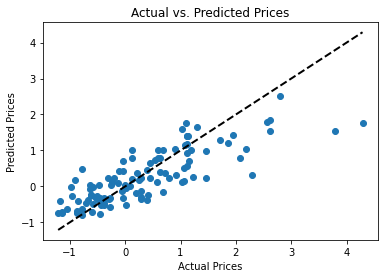

In [86]:
plt.scatter(y_test_RB, y_hat)
plt.plot([y_test_RB.min(), y_test_RB.max()], [y_test_RB.min(), y_test_RB.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [91]:
# y = df['y']

#define predictor variables
# x = df[['x1', 'x2']]

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.24
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          3.81e-123
Time:                        10:23:39   Log-Likelihood:                -8333.0
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.019e+05   2.62e+05  